In [1]:
# IMPORT REQUIRED LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# LOAD THE DATASET
df = pd.read_csv('amazon_prime_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


In [3]:
# BASIC DATA CHECKS
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7585 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


show_id            0
type               0
title              0
director        2083
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
description        0
dtype: int64

In [4]:
# DATA CLEANING

## Remove duplicates
df = df.drop_duplicates()

## Fill missing values in 'director' and 'cast' columns with 'Unknown'
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')

## Fill any missing 'country' with the mode (most common country)
df['country'] = df['country'].fillna(df['country'].mode()[0])

C:\Users\laksh\AppData\Local\Temp\ipykernel_29112\745503859.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts.index, y=type_counts.values, palette='Blues_r')


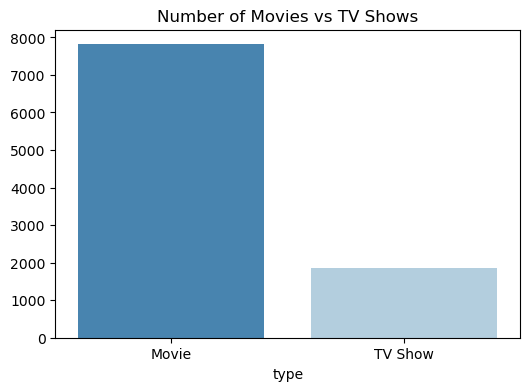

In [5]:
# ANALYZING CONTENT TYPE 

## Count number of Movies vs TV Shows
type_counts = df['type'].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x=type_counts.index, y=type_counts.values, palette='Blues_r')
plt.title('Number of Movies vs TV Shows')
plt.show()

C:\Users\laksh\AppData\Local\Temp\ipykernel_29112\3709767802.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.values, y=country_counts.index, palette='Blues_r')


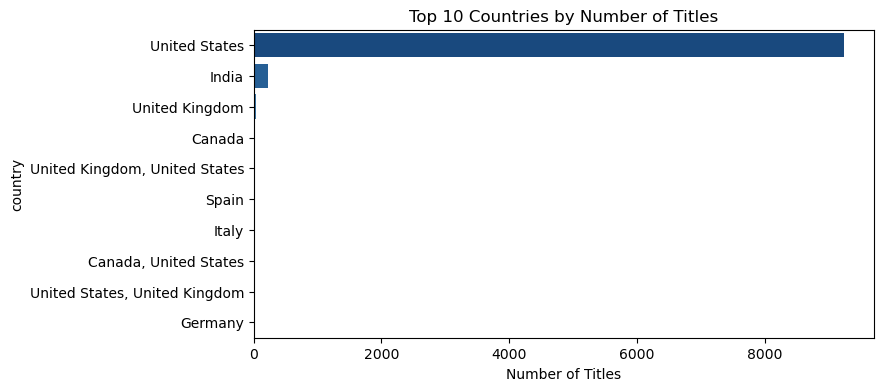

In [6]:
# TOP 10 COUNTRIES BY TITLE COUNT

country_counts = df['country'].value_counts().head(10)
plt.figure(figsize=(8,4))
sns.barplot(x=country_counts.values, y=country_counts.index, palette='Blues_r')
plt.xlabel('Number of Titles')
plt.title('Top 10 Countries by Number of Titles')
plt.show()

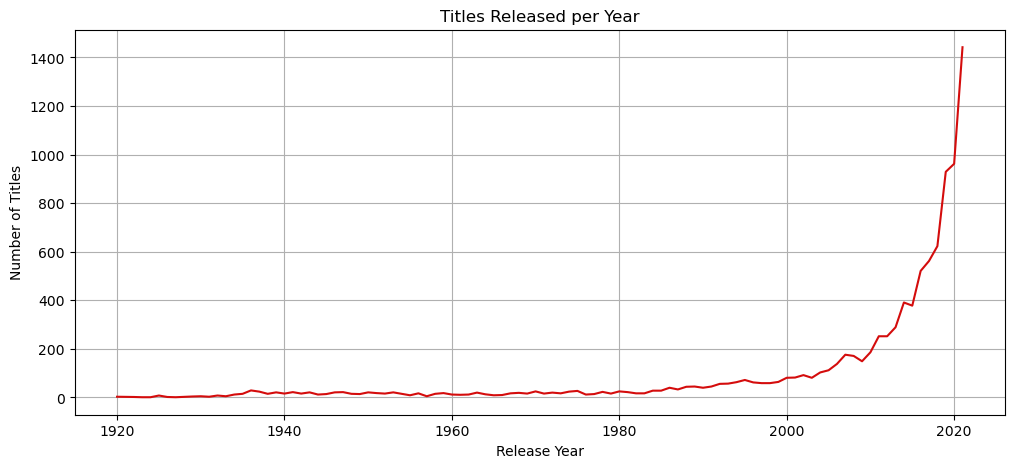

In [7]:
# RELEASE YEAR TRENDS

release_year_counts = df['release_year'].value_counts().sort_index()
plt.figure(figsize=(12,5))
release_year_counts.plot(kind='line', color="#D40C0C")
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.title('Titles Released per Year')
plt.grid()
plt.show()

C:\Users\laksh\AppData\Local\Temp\ipykernel_29112\2208021927.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='Greens_r')


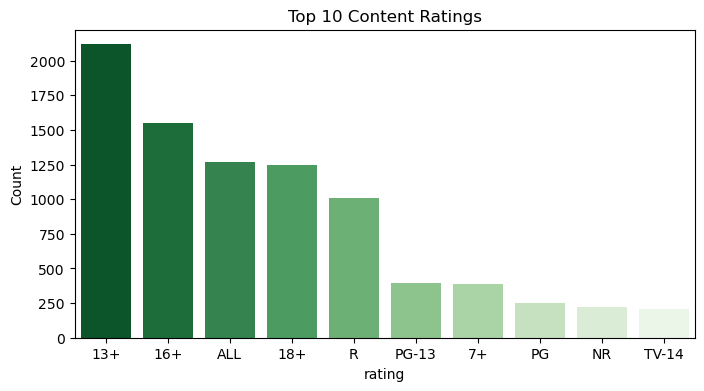

In [8]:
# CONTENT RATING DISTRIBUTION

rating_counts = df['rating'].value_counts().head(10)
plt.figure(figsize=(8,4))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='Greens_r')
plt.title('Top 10 Content Ratings')
plt.ylabel('Count')
plt.show()

C:\Users\laksh\AppData\Local\Temp\ipykernel_29112\4142370443.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[g[0] for g in genre_counts], y=[g[1] for g in genre_counts], palette='Blues')


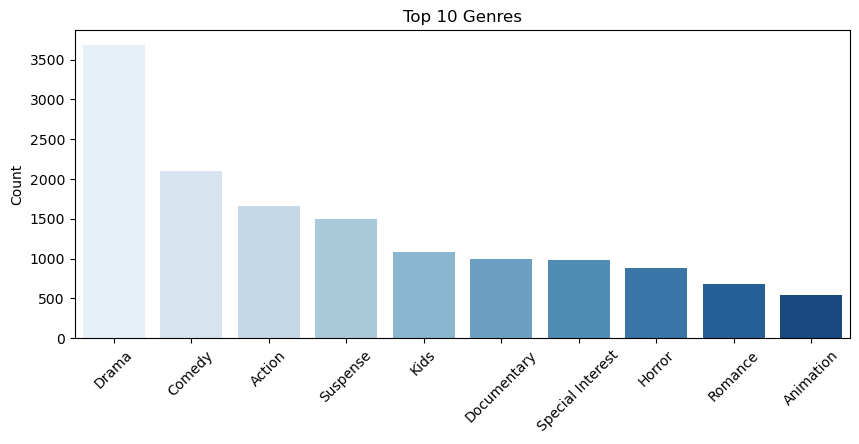

In [9]:
# MOST COMMON GENRES

## 'listed_in' column contains genres, separated by commas.
## Count appearances of each genre
from collections import Counter

genres = []
for entry in df['listed_in'].dropna():
    genres.extend([g.strip() for g in entry.split(',')])
genre_counts = Counter(genres).most_common(10)

plt.figure(figsize=(10,4))
sns.barplot(x=[g[0] for g in genre_counts], y=[g[1] for g in genre_counts], palette='Blues')
plt.xticks(rotation=45)
plt.title('Top 10 Genres')
plt.ylabel('Count')
plt.show()


In [10]:
# MAP VISUALIZATION PREPARED DATA

country_map = df[['show_id','country']].drop_duplicates()
country_map.to_csv('prime_video_country_map.csv', index=False)


In [11]:
# EXPORT CLEANED DATA FOR POWER BI

## Export the cleaned/processed DataFrame to use in Power BI
df.to_csv('prime_video_cleaned.csv', index=False)
